In [16]:
# Import required libraries
import sys
sys.path.append('../src')  # Add src to path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [17]:
# Load the data
data_path = 'C:\\Users\\Cooper\\Documents\\Projects\\nyc-building-energy-analyzer\\data\\raw\\nyc_energy_2022.csv'

try:
    df = pd.read_csv(data_path)
    print(f"✅ Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ Data file not found. Please download the NYC energy data and place it in data/raw/")
    print("Download from: https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-97-/usc3-8zwd")


✅ Data loaded successfully: 64169 rows, 265 columns


In [18]:
# Quick data overview
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nFirst 5 rows:")
df.head()


=== DATASET OVERVIEW ===
Shape: (64169, 265)
Memory usage: 894.29 MB

First 5 rows:


,Calendar Year,Property ID,Property Name,Parent Property ID,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,...,Aggregate Meter(s)-District Steam – Number of Individual Meters Included,Report Generation Date,Report Submission Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,2022,6414946,58-01 Grand Avenue,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4026780001,4059918,58-01 Grand Avenue,Queens,...,NaN,04/25/2023 11:01:00 AM,04/25/2023 11:02:00 AM,QUEENS,40.719667,-73.911197,405.0,30.0,531.0,QN0501
1,2022,9793770,1870 Pelham Parkway South,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,2042500026,2047795,1870 Pelham Parkway South,Bronx,...,NaN,03/11/2023 02:00:00 PM,03/11/2023 02:01:00 PM,BRONX,40.855488,-73.830726,210.0,13.0,300.0,BX1003
2,2022,10177418,Central Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4157040040,4300145,2011 Mott Ave,Far Rockaway,...,NaN,04/14/2023 03:47:00 PM,04/14/2023 03:47:00 PM,QUEENS,40.604320,-73.753009,414.0,31.0,100803.0,QN1401
3,2022,13511507,215 East 99th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,1016490009,1052383,215 East 99th Street,New York,...,NaN,03/12/2023 03:54:00 PM,03/12/2023 03:54:00 PM,MANHATTAN,40.786963,-73.947537,111.0,8.0,164.0,MN1101
4,2022,14009907,23-25 31 Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4008350027,4017180,23-25 31 Street,Queens,...,NaN,04/28/2023 02:22:00 PM,04/28/2023 02:23:00 PM,QUEENS,40.773768,-73.913573,401.0,22.0,115.0,QN0101


In [19]:
# Examine column names
print("=== COLUMN ANALYSIS ===")
print(f"Total columns: {len(df.columns)}")
print("\nAll columns:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")


=== COLUMN ANALYSIS ===
Total columns: 265

All columns:
 1. Calendar Year
 2. Property ID
 3. Property Name
 4. Parent Property ID
 5. Parent Property Name
 6. Year Ending
 7. NYC Borough, Block and Lot (BBL)
 8. NYC Building Identification Number (BIN)
 9. Address 1
10. City
11. Postal Code
12. Primary Property Type - Self Selected
13. Primary Property Type - Portfolio Manager-Calculated
14. National Median Reference Property Type
15. List of All Property Use Types (GFA) (ft²)
16. Largest Property Use Type
17. Largest Property Use Type - Gross Floor Area (ft²)
18. 2nd Largest Property Use Type
19. 2nd Largest Property Use Type - Gross Floor Area (ft²)
20. 3rd Largest Property Use Type
21. 3rd Largest Property Use Type - Gross Floor Area (ft²)
22. Year Built
23. Construction Status
24. Number of Buildings
25. Occupancy
26. Metered Areas (Energy)
27. Metered Areas (Water)
28. ENERGY STAR Score
29. National Median ENERGY STAR Score
30. Target ENERGY STAR Score
31. Reason(s) for No Score

In [20]:
# Identify key energy-related columns
energy_keywords = ['eui', 'energy', 'emissions', 'ghg', 'consumption', 'use']
building_keywords = ['property', 'building', 'type', 'address', 'year', 'area', 'gfa']

energy_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in energy_keywords)]
building_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in building_keywords)]

print("=== KEY COLUMNS IDENTIFIED ===")
print(f"\nEnergy-related columns ({len(energy_columns)}):")
for col in energy_columns:
    print(f"  - {col}")

print(f"\nBuilding info columns ({len(building_columns)}):")
for col in building_columns:
    print(f"  - {col}")


=== KEY COLUMNS IDENTIFIED ===

Energy-related columns (87):
  - List of All Property Use Types (GFA) (ft²)
  - Largest Property Use Type
  - Largest Property Use Type - Gross Floor Area (ft²)
  - 2nd Largest Property Use Type
  - 2nd Largest Property Use Type - Gross Floor Area (ft²)
  - 3rd Largest Property Use Type
  - 3rd Largest Property Use Type - Gross Floor Area (ft²)
  - Metered Areas (Energy)
  - ENERGY STAR Score
  - National Median ENERGY STAR Score
  - Target ENERGY STAR Score
  - ENERGY STAR Certification - Year(s) Certified (Score)
  - ENERGY STAR Certification - Last Approval Date
  - ENERGY STAR Certification - Application Status
  - Site EUI (kBtu/ft²)
  - Weather Normalized Site EUI (kBtu/ft²)
  - National Median Site EUI (kBtu/ft²)
  - Site Energy Use (kBtu)
  - Weather Normalized Site Energy Use (kBtu)
  - Electricity - Weather Normalized Site Electricity Use (Grid and Onsite Renewables) (kWh)
  - Natural Gas - Weather Normalized Site Natural Gas Use (therms)
  - S

In [21]:
# Data types and basic statistics
print("=== DATA TYPES ===")
print(df.dtypes.value_counts())

print("\n=== NUMERIC COLUMNS SUMMARY ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {len(numeric_cols)}")
df[numeric_cols].describe()


=== DATA TYPES ===
object     243
float64     11
int64       10
bool         1
Name: count, dtype: int64

=== NUMERIC COLUMNS SUMMARY ===
Numeric columns: 21


,Calendar Year,Property ID,Year Built,Number of Buildings,Occupancy,National Median ENERGY STAR Score,Property GFA - Self-Reported (ft²),Property GFA - Calculated (Buildings and Parking) (ft²),Property GFA - Calculated (Buildings) (ft²),Number of Active Energy Meters - Total,...,Number of Active Energy Meters - Not Used to Compute Metrics,Number of Active IT Meters,Aggregate Meter(s)-Electric – Number of Individual Meters Included,Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included,Aggregate Meter(s)-District Steam – Number of Individual Meters Included,Latitude,Longitude,Community Board,Council District,Census Tract (2020)
count,64169.000000,6.416900e+04,64169.000000,64169.000000,64169.000000,64169.0,6.416900e+04,6.415700e+04,6.415700e+04,64169.000000,...,64169.000000,64169.000000,33684.000000,33684.0,33684.0,61790.000000,61790.000000,61791.000000,61791.000000,61791.000000
mean,2022.524926,1.116790e+07,1951.318814,1.308404,97.057224,50.0,1.289762e+05,1.314226e+05,1.288583e+05,7.177173,...,0.245212,0.003241,0.000475,0.0,0.0,40.747879,-73.936054,236.232137,19.794096,9067.082391
std,0.499382,9.083941e+06,35.262775,4.311709,12.332866,0.0,3.205687e+05,3.285212e+05,3.205922e+05,13.932245,...,1.929641,0.111470,0.081911,0.0,0.0,0.078342,0.064506,118.822418,14.939890,21921.452576
min,2022.000000,7.365000e+03,1051.000000,0.000000,0.000000,50.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,40.509037,-74.244118,101.000000,1.000000,1.000000
25%,2022.000000,4.399348e+06,1925.000000,1.000000,100.000000,50.0,3.710800e+04,3.743000e+04,3.707100e+04,3.000000,...,0.000000,0.000000,0.000000,0.0,0.0,40.697285,-73.978987,108.000000,6.000000,140.000000
50%,2023.000000,6.691741e+06,1941.000000,1.000000,100.000000,50.0,6.191600e+04,6.236000e+04,6.181900e+04,5.000000,...,0.000000,0.000000,0.000000,0.0,0.0,40.750050,-73.946978,208.000000,16.000000,307.000000
75%,2023.000000,1.907245e+07,1974.000000,1.000000,100.000000,50.0,1.178400e+05,1.192500e+05,1.176810e+05,8.000000,...,0.000000,0.000000,0.000000,0.0,0.0,40.810227,-73.900956,314.000000,33.000000,1903.000000
max,2023.000000,3.609357e+07,2088.000000,514.000000,100.000000,50.0,2.115016e+07,2.204270e+07,2.115016e+07,1534.000000,...,210.000000,9.000000,15.000000,0.0,0.0,40.912869,-73.700935,595.000000,51.000000,157903.000000


In [22]:
# Missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Percentage', ascending=False)

# Show columns with missing values
columns_with_missing = missing_df[missing_df['Missing_Count'] > 0]
print(f"Columns with missing values: {len(columns_with_missing)} out of {len(df.columns)}")

if len(columns_with_missing) > 0:
    print("\nTop 15 columns with most missing values:")
    display(columns_with_missing.head(15))


=== MISSING VALUES ANALYSIS ===
Columns with missing values: 34 out of 265

Top 15 columns with most missing values:


,Column,Missing_Count,Missing_Percentage
245,Last Modified Date - Non-Electric Non-Gas Ener...,53692,83.672802
246,Last Modified Date - Water Meters,40017,62.361888
244,Last Modified Date - Gas Meters,37208,57.984385
242,Last Modified Date - Electric Meters,35808,55.802646
247,Last Modified Date - Property Use,33691,52.503545
248,Last Modified Date - Property Use Details,33691,52.503545
241,Last Modified Date - Property,33690,52.501987
82,Net Emissions (Metric Tons CO2e),33684,52.492637
243,Electric Distribution Utility,30485,47.507363
253,Aggregate Meter(s)-Electric – Number of Indivi...,30485,47.507363


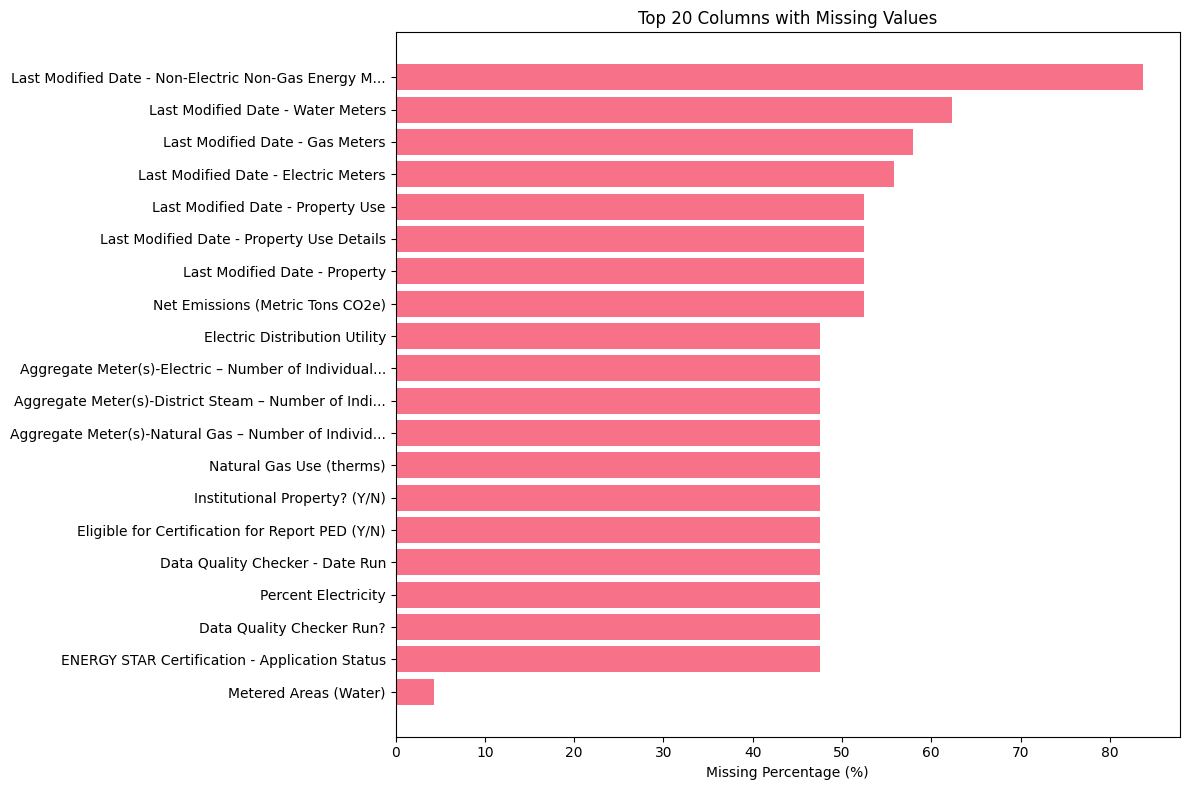

In [23]:
# Visualize missing values
if len(columns_with_missing) > 0:
    plt.figure(figsize=(12, 8))
    top_missing = columns_with_missing.head(20)
    plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
    plt.yticks(range(len(top_missing)), [col[:50] + '...' if len(col) > 50 else col 
              for col in top_missing['Column']])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [24]:
# Identify and examine key EUI columns
eui_columns = [col for col in df.columns if 'eui' in col.lower()]
print(f"=== EUI (Energy Use Intensity) COLUMNS ===")
print(f"Found {len(eui_columns)} EUI columns:")

for col in eui_columns:
    print(f"\n{col}:")
    print(f"  Non-null values: {df[col].count():,}")
    print(f"  Data type: {df[col].dtype}")
    if df[col].dtype in ['int64', 'float64']:
        print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")
        print(f"  Mean: {df[col].mean():.2f}")


=== EUI (Energy Use Intensity) COLUMNS ===
Found 6 EUI columns:

Site EUI (kBtu/ft²):
  Non-null values: 64,169
  Data type: object

Weather Normalized Site EUI (kBtu/ft²):
  Non-null values: 64,169
  Data type: object

National Median Site EUI (kBtu/ft²):
  Non-null values: 64,169
  Data type: object

Source EUI (kBtu/ft²):
  Non-null values: 64,169
  Data type: object

Weather Normalized Source EUI (kBtu/ft²):
  Non-null values: 64,169
  Data type: object

National Median Source EUI (kBtu/ft²):
  Non-null values: 64,169
  Data type: object


In [25]:
# %%
# Focus on Site EUI for main analysis
# First, make sure we have eui_columns defined
if 'eui_columns' not in locals():
    eui_columns = [col for col in df.columns if 'eui' in col.lower()]
    print(f"Found {len(eui_columns)} EUI columns: {eui_columns}")

# Find the main Site EUI column
site_eui_cols = [col for col in eui_columns if 'site' in col.lower()]

if site_eui_cols:
    main_eui_col = site_eui_cols[0]  # Use first Site EUI column
    print(f"=== MAIN ANALYSIS COLUMN: {main_eui_col} ===")
    
    # Check the data type and sample values
    print(f"Data type: {df[main_eui_col].dtype}")
    print(f"Sample values: {df[main_eui_col].head().tolist()}")
    
    # Convert to numeric, handling non-numeric values
    df[main_eui_col] = pd.to_numeric(df[main_eui_col], errors='coerce')
    
    # Basic statistics
    print(f"Total values: {df[main_eui_col].count():,}")
    print(f"Missing values (including conversion errors): {df[main_eui_col].isnull().sum():,}")
    print(f"Zero values: {(df[main_eui_col] == 0).sum():,}")
    print(f"Negative values: {(df[main_eui_col] < 0).sum():,}")
    
    # Remove invalid values for analysis
    valid_eui = df[main_eui_col].dropna()
    valid_eui = valid_eui[valid_eui > 0]  # Remove zero and negative
    
    print(f"\nValid EUI values for analysis: {len(valid_eui):,}")
    if len(valid_eui) > 0:
        print(f"Statistics:")
        print(f"  Mean: {valid_eui.mean():.2f} kBtu/ft²")
        print(f"  Median: {valid_eui.median():.2f} kBtu/ft²")
        print(f"  Std Dev: {valid_eui.std():.2f} kBtu/ft²")
        print(f"  Min: {valid_eui.min():.2f} kBtu/ft²")
        print(f"  Max: {valid_eui.max():.2f} kBtu/ft²")
    else:
        print("❌ No valid numeric EUI values found")
    
else:
    print("❌ No Site EUI column found")
    if 'eui_columns' in locals():
        print("Available EUI columns:", eui_columns)
    main_eui_col = None

=== MAIN ANALYSIS COLUMN: Site EUI (kBtu/ft²) ===
Data type: object
Sample values: ['10.1', '58.5', '63.8', '68.2', '51.1']
Total values: 59,778
Missing values (including conversion errors): 4,391
Zero values: 197
Negative values: 2

Valid EUI values for analysis: 59,579
Statistics:
  Mean: 7991.04 kBtu/ft²
  Median: 72.50 kBtu/ft²
  Std Dev: 233095.38 kBtu/ft²
  Min: 0.10 kBtu/ft²
  Max: 14931000.00 kBtu/ft²


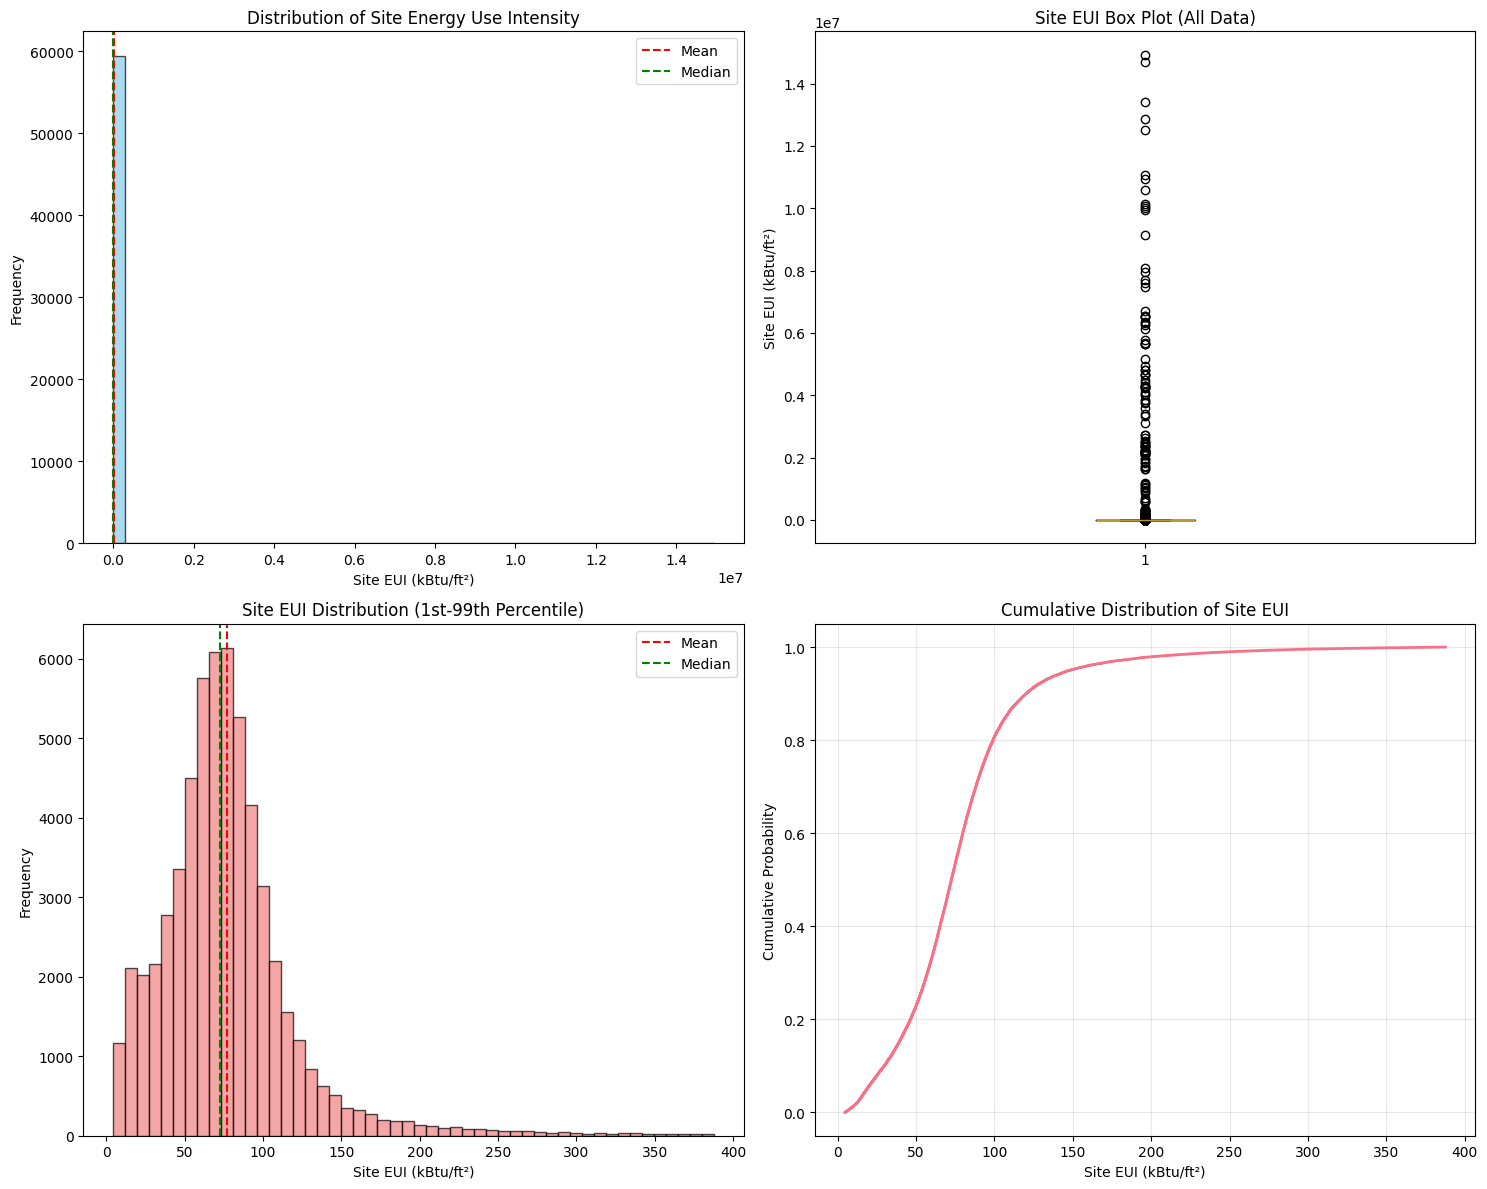

In [26]:
# EUI Distribution Analysis
if main_eui_col and len(valid_eui) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Histogram
    axes[0, 0].hist(valid_eui, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(valid_eui.mean(), color='red', linestyle='--', label='Mean')
    axes[0, 0].axvline(valid_eui.median(), color='green', linestyle='--', label='Median')
    axes[0, 0].set_xlabel('Site EUI (kBtu/ft²)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Site Energy Use Intensity')
    axes[0, 0].legend()
    
    # Box plot
    axes[0, 1].boxplot(valid_eui)
    axes[0, 1].set_ylabel('Site EUI (kBtu/ft²)')
    axes[0, 1].set_title('Site EUI Box Plot (All Data)')
    
    # Remove extreme outliers for better visualization
    q99 = valid_eui.quantile(0.99)
    q01 = valid_eui.quantile(0.01)
    filtered_eui = valid_eui[(valid_eui >= q01) & (valid_eui <= q99)]
    
    # Histogram without extreme outliers
    axes[1, 0].hist(filtered_eui, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, 0].axvline(filtered_eui.mean(), color='red', linestyle='--', label='Mean')
    axes[1, 0].axvline(filtered_eui.median(), color='green', linestyle='--', label='Median')
    axes[1, 0].set_xlabel('Site EUI (kBtu/ft²)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Site EUI Distribution (1st-99th Percentile)')
    axes[1, 0].legend()
    
    # Cumulative distribution
    sorted_eui = np.sort(filtered_eui)
    cumulative = np.arange(1, len(sorted_eui) + 1) / len(sorted_eui)
    axes[1, 1].plot(sorted_eui, cumulative, linewidth=2)
    axes[1, 1].set_xlabel('Site EUI (kBtu/ft²)')
    axes[1, 1].set_ylabel('Cumulative Probability')
    axes[1, 1].set_title('Cumulative Distribution of Site EUI')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [27]:
# Building Type Analysis
property_type_cols = [col for col in df.columns if 'property' in col.lower() and 'type' in col.lower()]

if property_type_cols and main_eui_col:
    prop_type_col = property_type_cols[0]
    print(f"=== BUILDING TYPE ANALYSIS: {prop_type_col} ===")
    
    # Building type distribution
    type_counts = df[prop_type_col].value_counts()
    print(f"\nBuilding Types (Top 15):")
    print(type_counts.head(15))
    
    # Create analysis dataset with valid EUI values
    analysis_df = df.dropna(subset=[main_eui_col, prop_type_col])
    analysis_df = analysis_df[analysis_df[main_eui_col] > 0]
    
    print(f"\nBuildings with valid EUI and type data: {len(analysis_df):,}")
    
    # Average EUI by building type
    avg_eui_by_type = analysis_df.groupby(prop_type_col)[main_eui_col].agg(['mean', 'median', 'count']).round(2)
    avg_eui_by_type = avg_eui_by_type.sort_values('mean', ascending=False)
    
    print(f"\nAverage EUI by Building Type (Top 15):")
    display(avg_eui_by_type.head(15))
else:
    print("❌ Property type column not found or no valid EUI data")


=== BUILDING TYPE ANALYSIS: Primary Property Type - Self Selected ===

Building Types (Top 15):
Primary Property Type - Self Selected
Multifamily Housing               41951
Office                             4983
K-12 School                        3767
Hotel                              1284
College/University                  964
Non-Refrigerated Warehouse          921
Manufacturing/Industrial Plant      801
Retail Store                        618
Self-Storage Facility               564
Mixed Use Property                  508
Residence Hall/Dormitory            465
Other - Recreation                  459
Worship Facility                    423
Parking                             359
Senior Living Community             343
Name: count, dtype: int64

Buildings with valid EUI and type data: 59,579

Average EUI by Building Type (Top 15):


,mean,median,count
Primary Property Type - Self Selected,,,
Residence Hall/Dormitory,25501.40,67.95,394
Energy/Power Station,12335.32,9697.80,5
Multifamily Housing,11524.49,74.70,39954
Zoo,6343.62,570.10,19
Senior Living Community,2191.53,105.00,314
Other,1972.12,81.00,88
Food Service,1366.58,179.40,25
Data Center,840.33,223.70,122
Drinking Water Treatment & Distribution,834.45,834.45,2


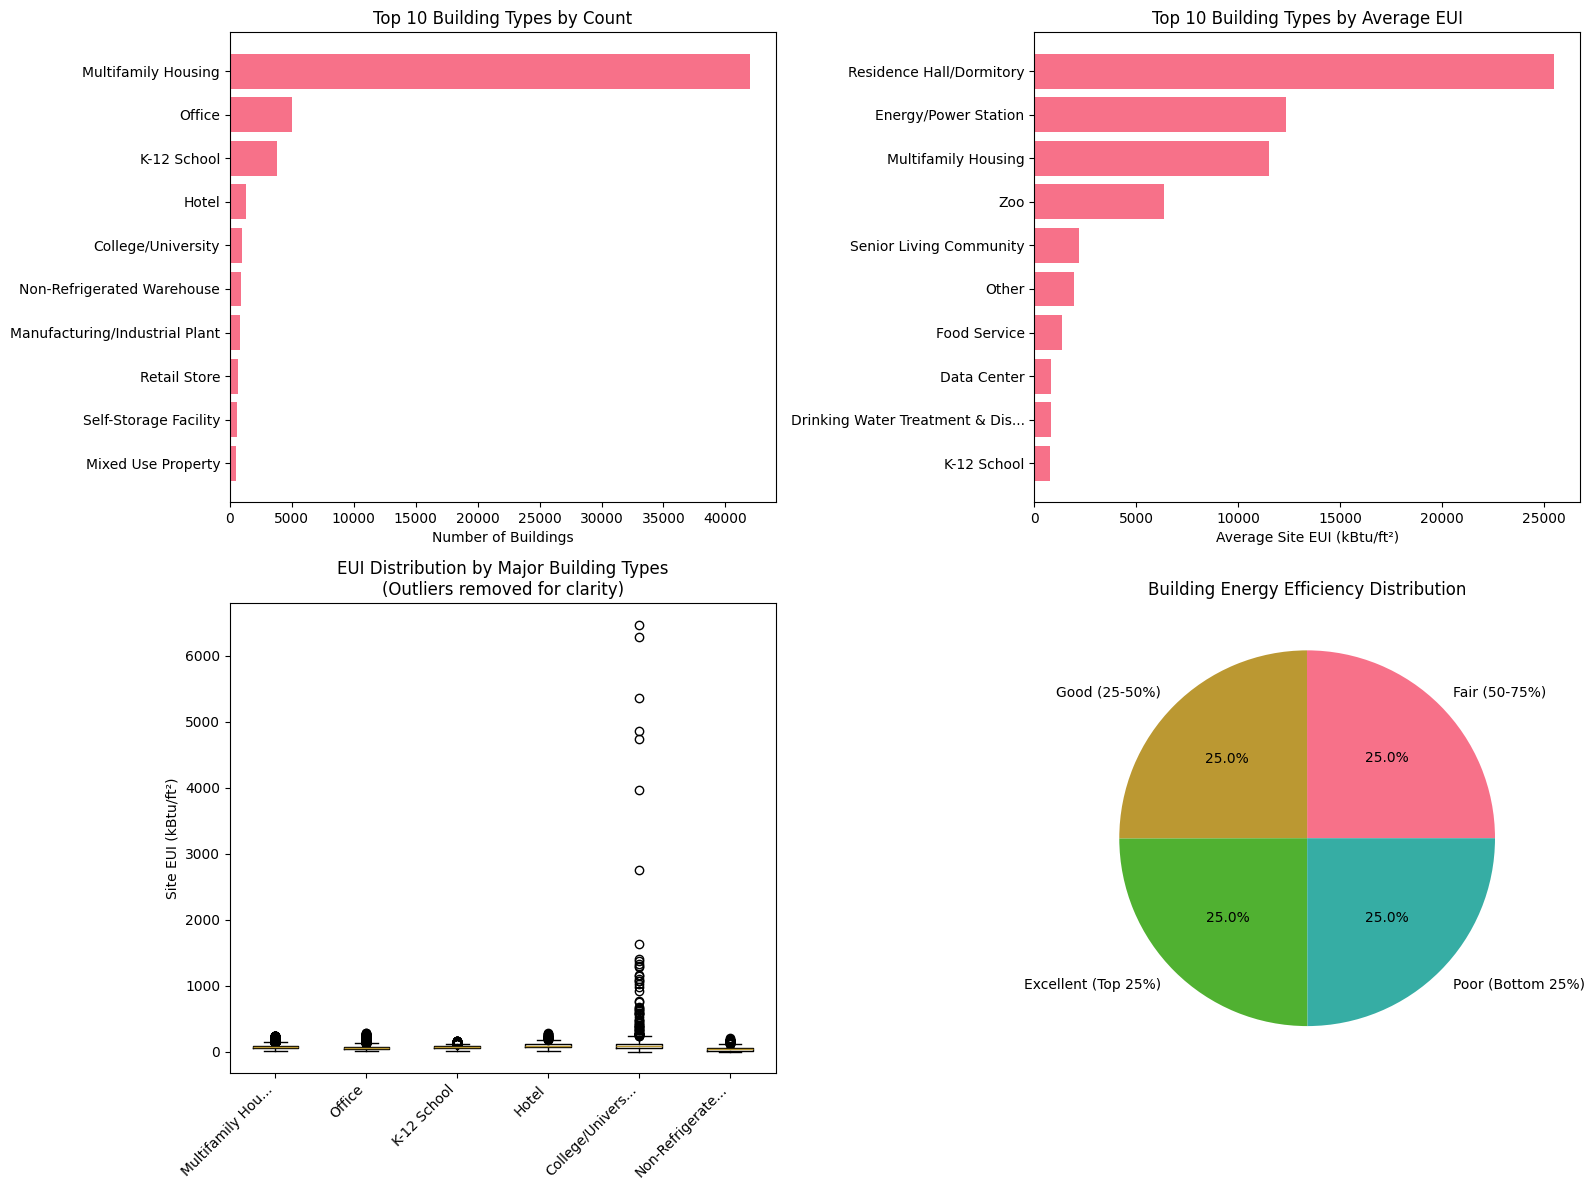

In [28]:
# Visualize Building Type Analysis
if property_type_cols and main_eui_col and len(analysis_df) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Building type distribution
    top_types = type_counts.head(10)
    axes[0, 0].barh(range(len(top_types)), top_types.values)
    axes[0, 0].set_yticks(range(len(top_types)))
    axes[0, 0].set_yticklabels([t[:30] + '...' if len(t) > 30 else t for t in top_types.index])
    axes[0, 0].set_xlabel('Number of Buildings')
    axes[0, 0].set_title('Top 10 Building Types by Count')
    axes[0, 0].invert_yaxis()
    
    # Average EUI by type
    top_eui_types = avg_eui_by_type.head(10)
    axes[0, 1].barh(range(len(top_eui_types)), top_eui_types['mean'])
    axes[0, 1].set_yticks(range(len(top_eui_types)))
    axes[0, 1].set_yticklabels([t[:30] + '...' if len(t) > 30 else t for t in top_eui_types.index])
    axes[0, 1].set_xlabel('Average Site EUI (kBtu/ft²)')
    axes[0, 1].set_title('Top 10 Building Types by Average EUI')
    axes[0, 1].invert_yaxis()
    
    # Box plot for major building types
    major_types = type_counts.head(6).index
    major_data = []
    major_labels = []
    
    for btype in major_types:
        data = analysis_df[analysis_df[prop_type_col] == btype][main_eui_col]
        if len(data) > 10:  # Only include types with sufficient data
            # Remove extreme outliers for visualization
            q99 = data.quantile(0.99)
            q01 = data.quantile(0.01)
            filtered_data = data[(data >= q01) & (data <= q99)]
            major_data.append(filtered_data.values)
            major_labels.append(btype[:15] + '...' if len(btype) > 15 else btype)
    
    if major_data:
        bp = axes[1, 0].boxplot(major_data, labels=major_labels)
        axes[1, 0].set_xticklabels(major_labels, rotation=45, ha='right')
        axes[1, 0].set_ylabel('Site EUI (kBtu/ft²)')
        axes[1, 0].set_title('EUI Distribution by Major Building Types\n(Outliers removed for clarity)')
    
    # Efficiency distribution pie chart
    median_eui = analysis_df[main_eui_col].median()
    q25_eui = analysis_df[main_eui_col].quantile(0.25)
    q75_eui = analysis_df[main_eui_col].quantile(0.75)
    
    efficiency_categories = []
    for eui in analysis_df[main_eui_col]:
        if eui <= q25_eui:
            efficiency_categories.append('Excellent (Top 25%)')
        elif eui <= median_eui:
            efficiency_categories.append('Good (25-50%)')
        elif eui <= q75_eui:
            efficiency_categories.append('Fair (50-75%)')
        else:
            efficiency_categories.append('Poor (Bottom 25%)')
    
    efficiency_counts = pd.Series(efficiency_categories).value_counts()
    axes[1, 1].pie(efficiency_counts.values, labels=efficiency_counts.index, autopct='%1.1f%%')
    axes[1, 1].set_title('Building Energy Efficiency Distribution')
    
    plt.tight_layout()
    plt.show()


In [29]:
# %%
# Fixed Building Area Analysis - using correct column
print("=== BUILDING AREA ANALYSIS (CORRECTED) ===")

# Use the correct area column
area_col = "Property GFA - Self-Reported (ft²)"
main_eui_col = "Site EUI (kBtu/ft²)"

print(f"Using area column: {area_col}")
print(f"Using EUI column: {main_eui_col}")

# Check data availability
print(f"\nData availability:")
print(f"  Area column non-null values: {df[area_col].count():,}")
print(f"  EUI column non-null values: {df[main_eui_col].count():,}")

# Create analysis dataset step by step
print(f"\nCreating analysis dataset:")
print(f"  Starting with: {len(df):,} total rows")

step1 = df.dropna(subset=[main_eui_col, area_col])
print(f"  After removing NaN EUI/Area: {len(step1):,} rows")

step2 = step1[step1[main_eui_col] > 0]
print(f"  After EUI > 0 filter: {len(step2):,} rows")

area_analysis_df = step2[step2[area_col] > 0]
print(f"  After Area > 0 filter: {len(area_analysis_df):,} rows")

if len(area_analysis_df) > 0:
    print(f"\n✅ SUCCESS! Buildings with valid EUI and area data: {len(area_analysis_df):,}")
    
    print(f"\nBuilding Area Statistics:")
    print(f"  Mean: {area_analysis_df[area_col].mean():,.0f} sq ft")
    print(f"  Median: {area_analysis_df[area_col].median():,.0f} sq ft")
    print(f"  Min: {area_analysis_df[area_col].min():,.0f} sq ft")
    print(f"  Max: {area_analysis_df[area_col].max():,.0f} sq ft")
    print(f"  25th percentile: {area_analysis_df[area_col].quantile(0.25):,.0f} sq ft")
    print(f"  75th percentile: {area_analysis_df[area_col].quantile(0.75):,.0f} sq ft")
    
    print(f"\nEUI Statistics for buildings with area data:")
    print(f"  Mean EUI: {area_analysis_df[main_eui_col].mean():.2f} kBtu/ft²")
    print(f"  Median EUI: {area_analysis_df[main_eui_col].median():.2f} kBtu/ft²")
    
    # Correlation between area and EUI
    correlation = area_analysis_df[area_col].corr(area_analysis_df[main_eui_col])
    print(f"\nCorrelation between building area and EUI: {correlation:.3f}")
    
    # Building size categories
    print(f"\nBuilding Size Distribution:")
    size_bins = [0, 10000, 50000, 100000, 250000, 500000, float('inf')]
    size_labels = ['<10K', '10K-50K', '50K-100K', '100K-250K', '250K-500K', '>500K']
    
    area_analysis_df['size_category'] = pd.cut(area_analysis_df[area_col], bins=size_bins, labels=size_labels)
    size_distribution = area_analysis_df['size_category'].value_counts().sort_index()
    
    for category, count in size_distribution.items():
        percentage = count / len(area_analysis_df) * 100
        print(f"  {category} sq ft: {count:,} buildings ({percentage:.1f}%)")
    
else:
    print("❌ Still no buildings with valid area and EUI data")

=== BUILDING AREA ANALYSIS (CORRECTED) ===
Using area column: Property GFA - Self-Reported (ft²)
Using EUI column: Site EUI (kBtu/ft²)

Data availability:
  Area column non-null values: 64,169
  EUI column non-null values: 59,778

Creating analysis dataset:
  Starting with: 64,169 total rows
  After removing NaN EUI/Area: 59,778 rows
  After EUI > 0 filter: 59,579 rows
  After Area > 0 filter: 59,579 rows

✅ SUCCESS! Buildings with valid EUI and area data: 59,579

Building Area Statistics:
  Mean: 129,195 sq ft
  Median: 62,753 sq ft
  Min: 1 sq ft
  Max: 21,150,159 sq ft
  25th percentile: 38,255 sq ft
  75th percentile: 118,306 sq ft

EUI Statistics for buildings with area data:
  Mean EUI: 7991.04 kBtu/ft²
  Median EUI: 72.50 kBtu/ft²

Correlation between building area and EUI: -0.014

Building Size Distribution:
  <10K sq ft: 975 buildings (1.6%)
  10K-50K sq ft: 22,112 buildings (37.1%)
  50K-100K sq ft: 18,247 buildings (30.6%)
  100K-250K sq ft: 12,409 buildings (20.8%)
  250K-5

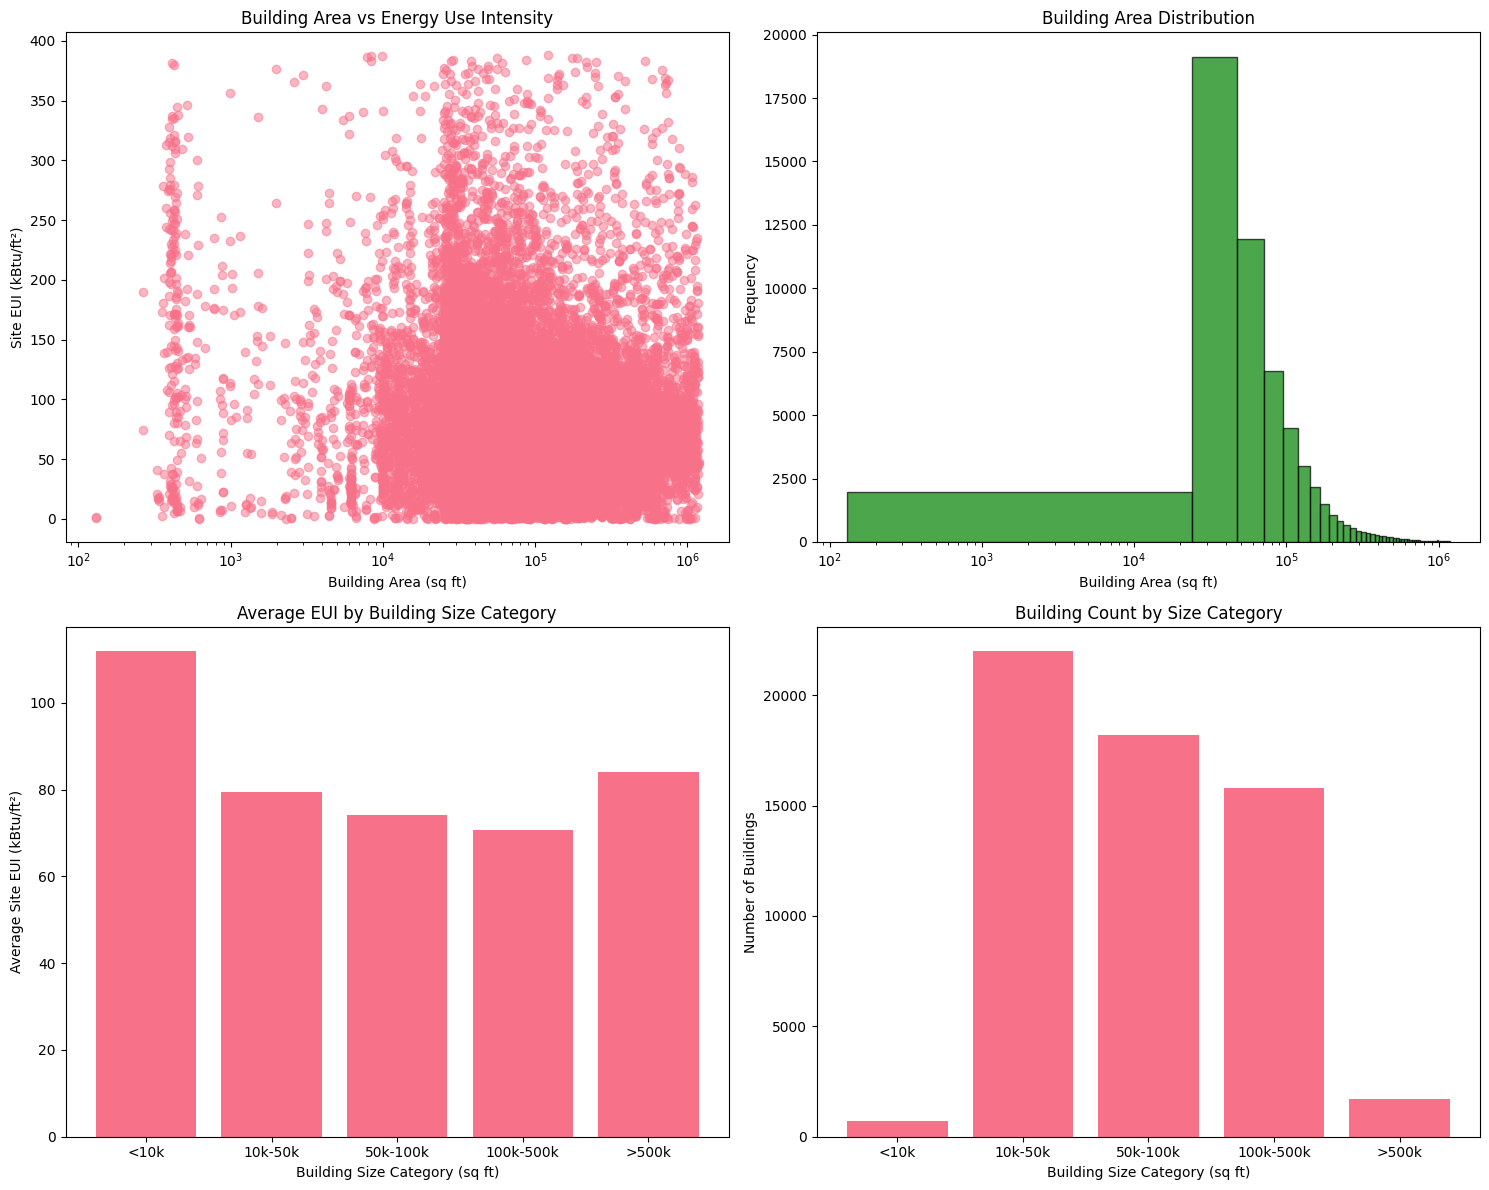


EUI Statistics by Building Size:


,mean,median,count
area_category,,,
<10k,111.841953,92.8,727
10k-50k,79.483528,77.1,21983
50k-100k,74.028701,72.3,18191
100k-500k,70.776965,66.8,15780
>500k,84.014810,71.5,1715


In [32]:
# Area vs EUI Visualization
if area_col and main_eui_col and len(area_analysis_df) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Remove extreme outliers for better visualization
    eui_q99 = area_analysis_df[main_eui_col].quantile(0.99)
    area_q99 = area_analysis_df[area_col].quantile(0.99)
    
    viz_df = area_analysis_df[
        (area_analysis_df[main_eui_col] <= eui_q99) & 
        (area_analysis_df[area_col] <= area_q99)
    ]
    
    # Scatter plot: Area vs EUI
    axes[0, 0].scatter(viz_df[area_col], viz_df[main_eui_col], alpha=0.5)
    axes[0, 0].set_xlabel('Building Area (sq ft)')
    axes[0, 0].set_ylabel('Site EUI (kBtu/ft²)')
    axes[0, 0].set_title('Building Area vs Energy Use Intensity')
    axes[0, 0].set_xscale('log')
    
    # Area distribution
    axes[0, 1].hist(viz_df[area_col], bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[0, 1].set_xlabel('Building Area (sq ft)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Building Area Distribution')
    axes[0, 1].set_xscale('log')
    
    # Binned area analysis
    area_bins = [0, 10000, 50000, 100000, 500000, float('inf')]
    area_labels = ['<10k', '10k-50k', '50k-100k', '100k-500k', '>500k']
    
    viz_df['area_category'] = pd.cut(viz_df[area_col], bins=area_bins, labels=area_labels)
    area_eui_stats = viz_df.groupby('area_category')[main_eui_col].agg(['mean', 'median', 'count'])
    
    axes[1, 0].bar(range(len(area_eui_stats)), area_eui_stats['mean'])
    axes[1, 0].set_xticks(range(len(area_eui_stats)))
    axes[1, 0].set_xticklabels(area_eui_stats.index)
    axes[1, 0].set_xlabel('Building Size Category (sq ft)')
    axes[1, 0].set_ylabel('Average Site EUI (kBtu/ft²)')
    axes[1, 0].set_title('Average EUI by Building Size Category')
    
    # Building count by size category
    axes[1, 1].bar(range(len(area_eui_stats)), area_eui_stats['count'])
    axes[1, 1].set_xticks(range(len(area_eui_stats)))
    axes[1, 1].set_xticklabels(area_eui_stats.index)
    axes[1, 1].set_xlabel('Building Size Category (sq ft)')
    axes[1, 1].set_ylabel('Number of Buildings')
    axes[1, 1].set_title('Building Count by Size Category')
    
    plt.tight_layout()
    plt.show()
    
    print("\nEUI Statistics by Building Size:")
    display(area_eui_stats)


In [33]:
# Efficiency Opportunities Analysis
if main_eui_col and area_col:
    print("=== EFFICIENCY OPPORTUNITIES ANALYSIS ===")
    
    # Use the cleaned analysis dataset
    opp_df = area_analysis_df.copy()
    
    # Calculate benchmarks
    overall_median = opp_df[main_eui_col].median()
    overall_25th = opp_df[main_eui_col].quantile(0.25)
    
    print(f"Energy Efficiency Benchmarks:")
    print(f"  25th percentile (excellent): {overall_25th:.2f} kBtu/ft²")
    print(f"  Median (good): {overall_median:.2f} kBtu/ft²")
    
    # Identify underperforming buildings
    underperformers = opp_df[opp_df[main_eui_col] > overall_median].copy()
    
    print(f"\nUnderperforming Buildings Analysis:")
    print(f"  Total buildings: {len(opp_df):,}")
    print(f"  Underperforming buildings: {len(underperformers):,} ({len(underperformers)/len(opp_df)*100:.1f}%)")
    
    # Calculate potential savings
    underperformers['excess_eui'] = underperformers[main_eui_col] - overall_median
    underperformers['annual_excess_kbtu'] = underperformers['excess_eui'] * underperformers[area_col]
    
    # Estimate cost savings (assuming $15 per MMBtu = $0.015 per kBtu)
    cost_per_kbtu = 0.015
    underperformers['potential_annual_savings'] = underperformers['annual_excess_kbtu'] * cost_per_kbtu
    
    total_potential_savings = underperformers['potential_annual_savings'].sum()
    total_excess_energy = underperformers['annual_excess_kbtu'].sum()
    
    print(f"\nPotential Impact:")
    print(f"  Total excess energy use: {total_excess_energy/1e6:.1f} million kBtu/year")
    print(f"  Total potential savings: ${total_potential_savings/1e6:.1f} million/year")
    print(f"  Average savings per underperforming building: ${underperformers['potential_annual_savings'].mean():,.0f}/year")
    print(f"  Median savings per underperforming building: ${underperformers['potential_annual_savings'].median():,.0f}/year")


=== EFFICIENCY OPPORTUNITIES ANALYSIS ===
Energy Efficiency Benchmarks:
  25th percentile (excellent): 51.80 kBtu/ft²
  Median (good): 72.50 kBtu/ft²

Underperforming Buildings Analysis:
  Total buildings: 59,579
  Underperforming buildings: 29,780 (50.0%)

Potential Impact:
  Total excess energy use: 380131.9 million kBtu/year
  Total potential savings: $5702.0 million/year
  Average savings per underperforming building: $191,470/year
  Median savings per underperforming building: $18,207/year


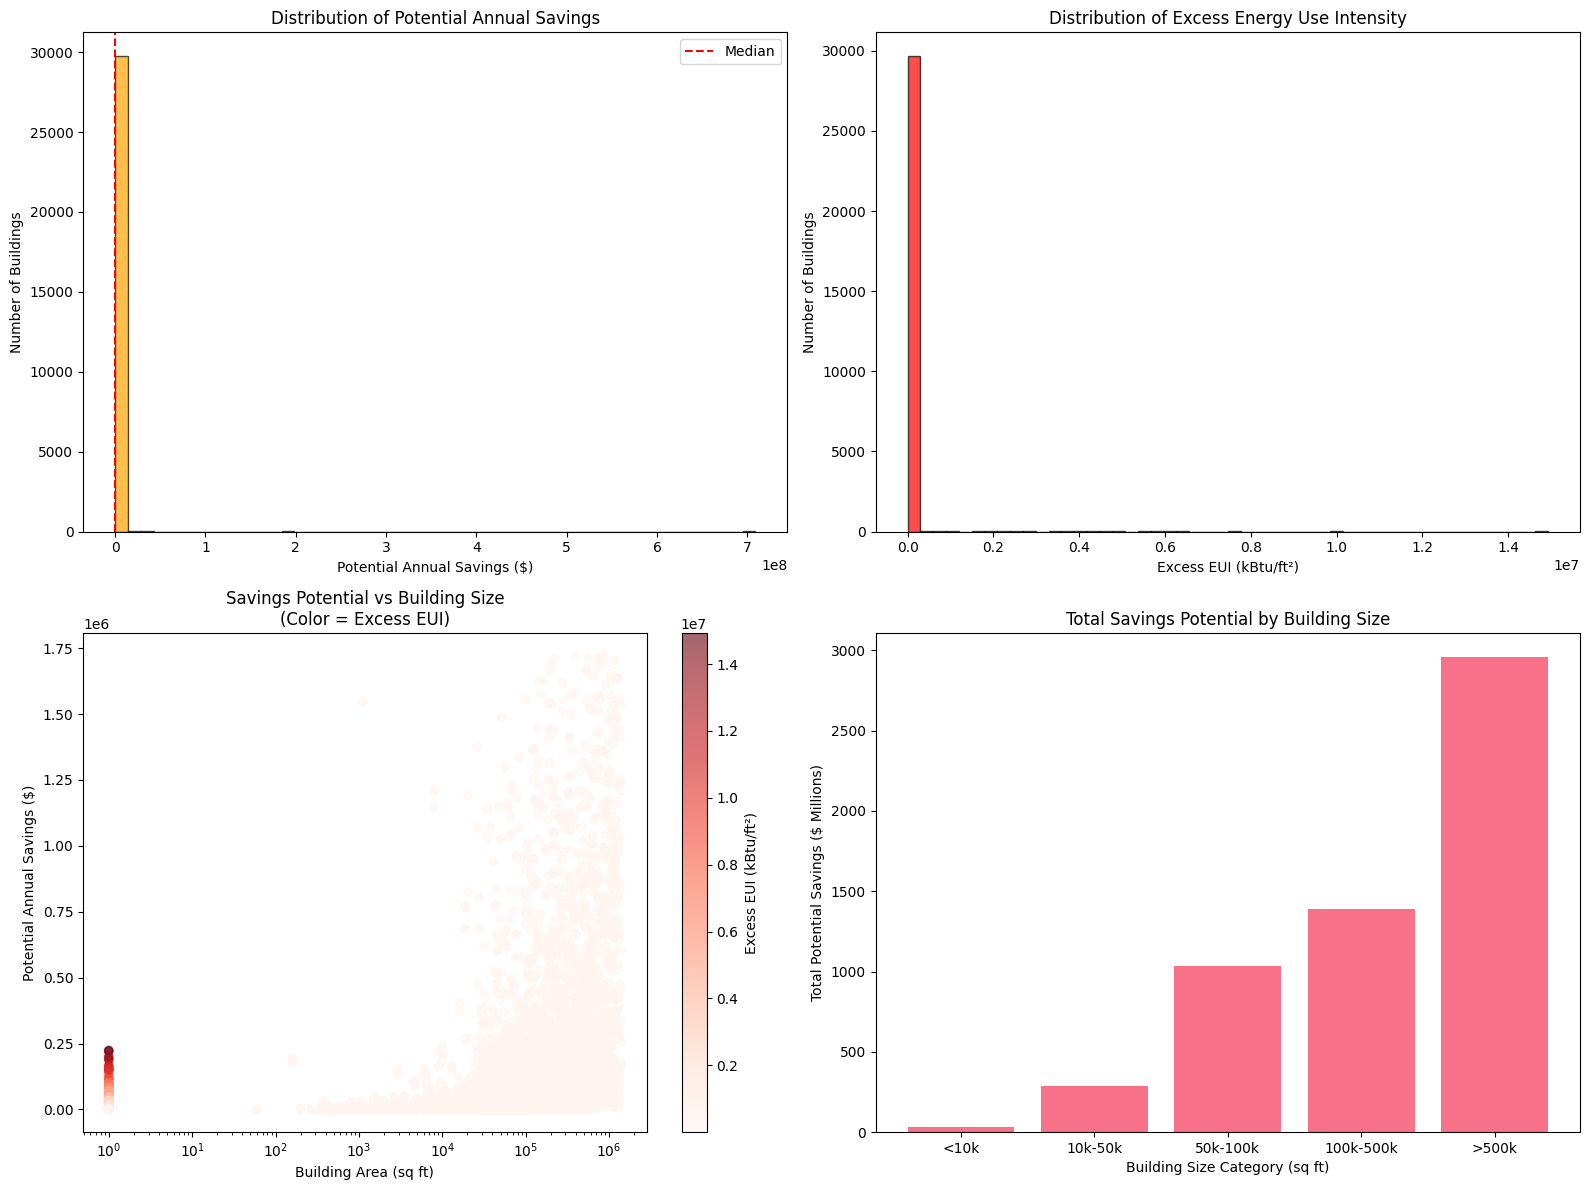


Savings Potential by Building Size Category:


,Total Savings,Avg per Building,Building Count
area_category,,,
<10k,$31.55M,"$46,944",672
10k-50k,$289.77M,"$23,707",12223
50k-100k,$1031.56M,"$113,745",9069
100k-500k,$1388.31M,"$211,665",6559
>500k,$2960.80M,"$2,355,447",1257


In [34]:
# Savings Opportunity Visualization
if main_eui_col and area_col and len(underperformers) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Potential savings distribution
    axes[0, 0].hist(underperformers['potential_annual_savings'], bins=50, 
                   alpha=0.7, color='orange', edgecolor='black')
    axes[0, 0].set_xlabel('Potential Annual Savings ($)')
    axes[0, 0].set_ylabel('Number of Buildings')
    axes[0, 0].set_title('Distribution of Potential Annual Savings')
    axes[0, 0].axvline(underperformers['potential_annual_savings'].median(), 
                      color='red', linestyle='--', label='Median')
    axes[0, 0].legend()
    
    # Excess EUI distribution
    axes[0, 1].hist(underperformers['excess_eui'], bins=50, 
                   alpha=0.7, color='red', edgecolor='black')
    axes[0, 1].set_xlabel('Excess EUI (kBtu/ft²)')
    axes[0, 1].set_ylabel('Number of Buildings')
    axes[0, 1].set_title('Distribution of Excess Energy Use Intensity')
    
    # Savings vs building size
    # Remove extreme outliers for visualization
    savings_q99 = underperformers['potential_annual_savings'].quantile(0.99)
    area_q99 = underperformers[area_col].quantile(0.99)
    
    viz_underperformers = underperformers[
        (underperformers['potential_annual_savings'] <= savings_q99) & 
        (underperformers[area_col] <= area_q99)
    ]
    
    scatter = axes[1, 0].scatter(viz_underperformers[area_col], 
                                viz_underperformers['potential_annual_savings'], 
                                c=viz_underperformers['excess_eui'], 
                                cmap='Reds', alpha=0.6)
    axes[1, 0].set_xlabel('Building Area (sq ft)')
    axes[1, 0].set_ylabel('Potential Annual Savings ($)')
    axes[1, 0].set_title('Savings Potential vs Building Size\n(Color = Excess EUI)')
    axes[1, 0].set_xscale('log')
    plt.colorbar(scatter, ax=axes[1, 0], label='Excess EUI (kBtu/ft²)')
    
    # Savings by area category
    underperformers['area_category'] = pd.cut(underperformers[area_col], 
                                            bins=area_bins, labels=area_labels)
    
    savings_by_area = underperformers.groupby('area_category')['potential_annual_savings'].agg(['sum', 'mean', 'count'])
    
    axes[1, 1].bar(range(len(savings_by_area)), savings_by_area['sum'] / 1e6)
    axes[1, 1].set_xticks(range(len(savings_by_area)))
    axes[1, 1].set_xticklabels(savings_by_area.index)
    axes[1, 1].set_xlabel('Building Size Category (sq ft)')
    axes[1, 1].set_ylabel('Total Potential Savings ($ Millions)')
    axes[1, 1].set_title('Total Savings Potential by Building Size')
    
    plt.tight_layout()
    plt.show()
    
    print("\nSavings Potential by Building Size Category:")
    savings_by_area_display = savings_by_area.copy()
    savings_by_area_display['sum'] = savings_by_area_display['sum'].apply(lambda x: f"${x/1e6:.2f}M")
    savings_by_area_display['mean'] = savings_by_area_display['mean'].apply(lambda x: f"${x:,.0f}")
    savings_by_area_display.columns = ['Total Savings', 'Avg per Building', 'Building Count']
    display(savings_by_area_display)


=== SAVINGS BY BUILDING TYPE (FIXED) ===
Available property type columns:
  Primary Property Type - Self Selected: 64,169 non-null, samples: ['Non-Refrigerated Warehouse', 'Multifamily Housing', 'Mixed Use Property']
  Primary Property Type - Portfolio Manager-Calculated: 64,169 non-null, samples: ['Non-Refrigerated Warehouse', 'Multifamily Housing', 'Mixed Use Property']
  National Median Reference Property Type: 62,998 non-null, samples: ['CBECS - Non-Refrigerated Warehouse', 'Fannie Mae Industry Survey - Multifamily', 'CBECS - Other']
  List of All Property Use Types (GFA) (ft²): 64,160 non-null, samples: ['Non-Refrigerated Warehouse (51749.0)', 'Multifamily Housing (52941.0)', 'Office (17598.0), Retail Store (17598.0)']
  Largest Property Use Type: 64,169 non-null, samples: ['Non-Refrigerated Warehouse', 'Multifamily Housing', 'Office']
  Largest Property Use Type - Gross Floor Area (ft²): 64,169 non-null, samples: [51749, 52941, 17598]
  2nd Largest Property Use Type: 64,169 non-n

,Total Savings ($M),Avg Savings ($K),Building Count,Avg Excess EUI
Primary Property Type - Self Selected,,,,
Multifamily Housing,1929.20,90.5,21327,21474.33
Senior Living Community,1443.53,6116.6,236,2826.40
Hospital (General Medical & Surgical),439.14,2287.2,192,203.53
Data Center,415.96,3495.4,119,787.34
College/University,270.02,820.7,329,965.26
Office,234.21,158.6,1477,57.21
Laboratory,154.91,2245.1,69,374.08
Manufacturing/Industrial Plant,99.65,511.0,195,220.52
Mixed Use Property,91.58,372.3,246,70.79


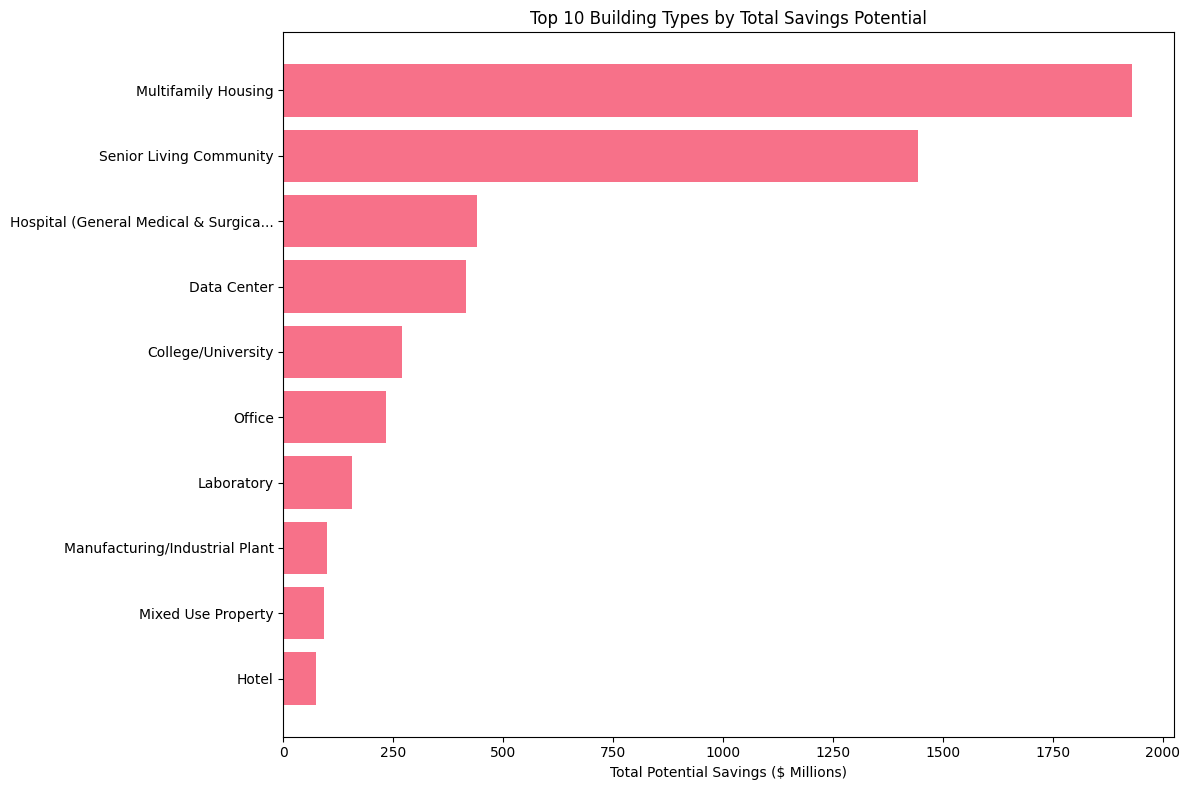


Available variables in current session:
  ✅ df: (64169, 265)
  ✅ main_eui_col: Site EUI (kBtu/ft²)
  ✅ area_col: Property GFA - Self-Reported (ft²)
  ✅ underperformers: (29780, 270)
  ✅ area_analysis_df: (59579, 266)


In [35]:
# %%
# Building Type Savings Analysis - Fixed
print("=== SAVINGS BY BUILDING TYPE (FIXED) ===")

# First, let's identify the correct property type column
property_type_candidates = [col for col in df.columns if 'property' in col.lower() and 'type' in col.lower()]
print("Available property type columns:")
for col in property_type_candidates:
    non_null_count = df[col].count()
    sample_values = df[col].dropna().head(3).tolist()
    print(f"  {col}: {non_null_count:,} non-null, samples: {sample_values}")

# Use the best property type column (most complete data)
if property_type_candidates:
    prop_type_col = property_type_candidates[0]  # Use first one (usually the main one)
    print(f"\nUsing property type column: {prop_type_col}")
    
    # Check if we have the required variables
    if 'underperformers' not in locals():
        print("❌ 'underperformers' dataframe not found. Please run the efficiency opportunities analysis first.")
    else:
        print(f"Underperformers dataframe: {len(underperformers):,} buildings")
        
        # Add property type to underperformers dataframe
        # Make sure we use the same index
        underperformers_with_type = underperformers.copy()
        underperformers_with_type[prop_type_col] = df.loc[underperformers.index, prop_type_col]
        
        # Remove buildings without property type data
        underperformers_with_type = underperformers_with_type.dropna(subset=[prop_type_col])
        
        print(f"Underperformers with property type data: {len(underperformers_with_type):,}")
        
        if len(underperformers_with_type) > 0:
            # Check required columns exist
            required_cols = ['potential_annual_savings', 'excess_eui']
            missing_cols = [col for col in required_cols if col not in underperformers_with_type.columns]
            
            if missing_cols:
                print(f"❌ Missing required columns: {missing_cols}")
                print(f"Available columns in underperformers: {list(underperformers_with_type.columns)}")
            else:
                type_savings = underperformers_with_type.groupby(prop_type_col).agg({
                    'potential_annual_savings': ['sum', 'mean', 'count'],
                    'excess_eui': 'mean'
                }).round(2)
                
                type_savings.columns = ['Total_Savings', 'Avg_Savings_Per_Building', 'Count', 'Avg_Excess_EUI']
                type_savings = type_savings.sort_values('Total_Savings', ascending=False)
                
                print(f"\n✅ Top 15 Building Types by Total Potential Savings:")
                top_savings_types = type_savings.head(15).copy()
                top_savings_types['Total_Savings_M'] = (top_savings_types['Total_Savings'] / 1e6).round(2)
                top_savings_types['Avg_Savings_K'] = (top_savings_types['Avg_Savings_Per_Building'] / 1e3).round(1)
                
                display_cols = ['Total_Savings_M', 'Avg_Savings_K', 'Count', 'Avg_Excess_EUI']
                display_labels = ['Total Savings ($M)', 'Avg Savings ($K)', 'Building Count', 'Avg Excess EUI']
                
                display_df = top_savings_types[display_cols].copy()
                display_df.columns = display_labels
                display(display_df)
                
                # Visualize top building types by savings
                plt.figure(figsize=(12, 8))
                top_10_types = type_savings.head(10)
                plt.barh(range(len(top_10_types)), top_10_types['Total_Savings'] / 1e6)
                plt.yticks(range(len(top_10_types)), 
                          [t[:35] + '...' if len(t) > 35 else t for t in top_10_types.index])
                plt.xlabel('Total Potential Savings ($ Millions)')
                plt.title('Top 10 Building Types by Total Savings Potential')
                plt.gca().invert_yaxis()
                plt.tight_layout()
                plt.show()
        else:
            print("❌ No underperforming buildings with property type data")
else:
    print("❌ No property type columns found")

# Also check what variables we have available
print(f"\nAvailable variables in current session:")
key_vars = ['df', 'main_eui_col', 'area_col', 'underperformers', 'area_analysis_df']
for var in key_vars:
    if var in locals():
        if hasattr(locals()[var], 'shape'):
            print(f"  ✅ {var}: {locals()[var].shape}")
        else:
            print(f"  ✅ {var}: {locals()[var]}")
    else:
        print(f"  ❌ {var}: Not found")

In [36]:
# %%
# Executive Summary - Fixed
print("\n" + "="*80)
print("NYC BUILDING ENERGY EFFICIENCY ANALYSIS - EXECUTIVE SUMMARY")
print("="*80)

# Make sure we have the correct variables defined
if 'area_analysis_df' in locals() and 'main_eui_col' in locals():
    opp_df = area_analysis_df  # Use the corrected analysis dataframe
    
    print(f"\n📊 DATASET OVERVIEW:")
    print(f"   • Total buildings analyzed: {len(opp_df):,}")
    print(f"   • Average energy intensity: {opp_df[main_eui_col].mean():.1f} kBtu/ft²")
    print(f"   • Median energy intensity: {opp_df[main_eui_col].median():.1f} kBtu/ft²")
    print(f"   • Energy intensity range: {opp_df[main_eui_col].min():.1f} - {opp_df[main_eui_col].max():.1f} kBtu/ft²")
    
    if 'underperformers' in locals() and len(underperformers) > 0:
        if 'total_potential_savings' in locals() and 'total_excess_energy' in locals():
            print(f"\n🎯 EFFICIENCY OPPORTUNITIES:")
            print(f"   • Buildings below median efficiency: {len(underperformers):,} ({len(underperformers)/len(opp_df)*100:.1f}%)")
            print(f"   • Total potential annual savings: ${total_potential_savings/1e6:.1f} million")
            print(f"   • Average savings per underperforming building: ${underperformers['potential_annual_savings'].mean():,.0f}")
            print(f"   • Total excess energy use: {total_excess_energy/1e6:.1f} million kBtu/year")
        else:
            print(f"\n🎯 EFFICIENCY OPPORTUNITIES:")
            print(f"   • Buildings below median efficiency: {len(underperformers):,} ({len(underperformers)/len(opp_df)*100:.1f}%)")
    
    # Find the correct property type column
    property_type_candidates = [col for col in df.columns if 'property' in col.lower() and 'type' in col.lower()]
    
    if property_type_candidates:
        prop_type_col = property_type_candidates[0]  # Use the first (main) property type column
        
        print(f"\n🏢 BUILDING INSIGHTS:")
        print(f"   • Property type column used: {prop_type_col}")
        
        # Get property type data safely
        try:
            # Create a safe merge to get property types
            building_types_df = opp_df.merge(
                df[[prop_type_col]].dropna(), 
                left_index=True, 
                right_index=True, 
                how='inner'
            )
            
            if len(building_types_df) > 0:
                most_common_type = building_types_df[prop_type_col].mode()[0]
                unique_types = len(building_types_df[prop_type_col].unique())
                most_common_count = len(building_types_df[building_types_df[prop_type_col] == most_common_type])
                
                print(f"   • Buildings with property type data: {len(building_types_df):,}")
                print(f"   • Total building types: {unique_types}")
                print(f"   • Most common building type: {most_common_type}")
                print(f"   • Buildings of most common type: {most_common_count:,}")
                
                # Top 5 building types
                type_counts = building_types_df[prop_type_col].value_counts().head(5)
                print(f"   • Top 5 building types:")
                for i, (btype, count) in enumerate(type_counts.items(), 1):
                    percentage = count / len(building_types_df) * 100
                    print(f"     {i}. {btype}: {count:,} buildings ({percentage:.1f}%)")
                    
            else:
                print(f"   • No buildings with property type data available")
                
        except Exception as e:
            print(f"   • Error accessing property type data: {e}")
            print(f"   • Available columns: {list(df.columns)[:10]}...")  # Show first 10 columns
    else:
        print(f"\n🏢 BUILDING INSIGHTS:")
        print(f"   • No property type columns found")

else:
    print(f"\n❌ Required analysis data not available")
    print(f"   • Please run the previous analysis cells first")
    
    # Show what variables are available
    key_vars = ['df', 'main_eui_col', 'area_col', 'area_analysis_df', 'underperformers']
    print(f"\n📋 Variable Status:")
    for var in key_vars:
        if var in locals():
            if hasattr(locals()[var], 'shape'):
                print(f"   ✅ {var}: {locals()[var].shape}")
            else:
                print(f"   ✅ {var}: available")
        else:
            print(f"   ❌ {var}: missing")

print(f"\n🔧 RECOMMENDED NEXT STEPS:")
print(f"   1. Focus HVAC optimization on underperforming buildings")
print(f"   2. Develop energy efficiency retrofits for buildings >75th percentile EUI")
print(f"   3. Create predictive models for identifying efficiency opportunities")
print(f"   4. Implement building automation systems for continuous monitoring")

if 'total_potential_savings' in locals() and 'total_excess_energy' in locals():
    print(f"\n📈 BUSINESS IMPACT:")
    print(f"   • Estimated ROI potential: ${total_potential_savings/1e6:.1f}M annually")
    print(f"   • CO2 reduction potential: ~{total_excess_energy/293:.0f} metric tons CO2/year")
    print(f"   • Energy reduction potential: {total_excess_energy/1e6:.1f} million kBtu/year")
else:
    print(f"\n📈 BUSINESS IMPACT:")
    print(f"   • Significant energy savings opportunities identified")
    print(f"   • Detailed ROI calculations available from efficiency analysis")

print("="*80)



NYC BUILDING ENERGY EFFICIENCY ANALYSIS - EXECUTIVE SUMMARY

📊 DATASET OVERVIEW:
   • Total buildings analyzed: 59,579
   • Average energy intensity: 7991.0 kBtu/ft²
   • Median energy intensity: 72.5 kBtu/ft²
   • Energy intensity range: 0.1 - 14931000.0 kBtu/ft²

🎯 EFFICIENCY OPPORTUNITIES:
   • Buildings below median efficiency: 29,780 (50.0%)
   • Total potential annual savings: $5702.0 million
   • Average savings per underperforming building: $191,470
   • Total excess energy use: 380131.9 million kBtu/year

🏢 BUILDING INSIGHTS:
   • Property type column used: Primary Property Type - Self Selected
   • Error accessing property type data: 'Primary Property Type - Self Selected'
   • Available columns: ['Calendar Year', 'Property ID', 'Property Name', 'Parent Property ID', 'Parent Property Name', 'Year Ending', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)', 'Address 1', 'City']...

🔧 RECOMMENDED NEXT STEPS:
   1. Focus HVAC optimization on underper

In [40]:
# %%
# Save key results for next steps - Fixed
print("\n💾 SAVING ANALYSIS RESULTS...")

# Create directories if they don't exist
from pathlib import Path
processed_dir = Path('data/processed')  # Use relative path from project root
processed_dir.mkdir(parents=True, exist_ok=True)
print(f"✅ Created directory: {processed_dir.absolute()}")

# Define clean_df if it doesn't exist
if 'clean_df' not in locals():
    if 'area_analysis_df' in locals():
        clean_df = area_analysis_df.copy()
        print("✅ Using area_analysis_df as clean_df")
    else:
        print("❌ No clean dataset available to save")
        clean_df = None

# Check what variables we have
print(f"\nVariable check:")
variables_to_check = {
    'clean_df': clean_df,
    'main_eui_col': main_eui_col if 'main_eui_col' in locals() else None,
    'area_col': area_col if 'area_col' in locals() else None,
    'underperformers': underperformers if 'underperformers' in locals() else None,
    'total_potential_savings': total_potential_savings if 'total_potential_savings' in locals() else None
}

for var_name, var_value in variables_to_check.items():
    if var_value is not None:
        if hasattr(var_value, 'shape'):
            print(f"  ✅ {var_name}: {var_value.shape}")
        else:
            print(f"  ✅ {var_name}: {var_value}")
    else:
        print(f"  ❌ {var_name}: Not available")

# Save files only if data exists
saved_files = []

if clean_df is not None and len(clean_df) > 0:
    try:
        clean_df.to_csv('data/processed/nyc_energy_clean.csv', index=False)
        saved_files.append('nyc_energy_clean.csv')
        print(f"✅ Saved: nyc_energy_clean.csv ({len(clean_df):,} rows)")
    except Exception as e:
        print(f"❌ Error saving clean dataset: {e}")

if 'underperformers' in locals() and underperformers is not None and len(underperformers) > 0:
    try:
        underperformers.to_csv('data/processed/underperforming_buildings.csv', index=False)
        saved_files.append('underperforming_buildings.csv')
        print(f"✅ Saved: underperforming_buildings.csv ({len(underperformers):,} rows)")
    except Exception as e:
        print(f"❌ Error saving underperformers: {e}")

# Create summary statistics
summary_stats = {}

if clean_df is not None and 'main_eui_col' in locals():
    summary_stats.update({
        'total_buildings': len(clean_df),
        'median_eui': float(clean_df[main_eui_col].median()),
        'mean_eui': float(clean_df[main_eui_col].mean()),
        'main_eui_column': main_eui_col,
    })

if 'underperformers' in locals() and underperformers is not None:
    summary_stats.update({
        'underperformers_count': len(underperformers),
    })

if 'total_potential_savings' in locals():
    summary_stats.update({
        'total_potential_savings': float(total_potential_savings),
    })

if 'area_col' in locals():
    summary_stats.update({
        'area_column': area_col,
    })

# Save summary statistics
if summary_stats:
    try:
        import json
        with open('data/processed/analysis_summary.json', 'w') as f:
            json.dump(summary_stats, f, indent=2)
        saved_files.append('analysis_summary.json')
        print(f"✅ Saved: analysis_summary.json")
        
        # Display summary stats
        print(f"\n📊 SUMMARY STATISTICS:")
        for key, value in summary_stats.items():
            if isinstance(value, float):
                print(f"   • {key}: {value:,.2f}")
            else:
                print(f"   • {key}: {value}")
                
    except Exception as e:
        print(f"❌ Error saving summary: {e}")

# Summary of saved files
print(f"\n📁 SAVED FILES TO data/processed/:")
for file in saved_files:
    print(f"   • {file}")

if not saved_files:
    print("   ❌ No files were saved due to missing data")
    print("   💡 Make sure to run the previous analysis cells first")
else:
    print(f"\n✅ Analysis results saved successfully!")
    print(f"📂 Files location: {Path('data/processed').absolute()}")


💾 SAVING ANALYSIS RESULTS...
✅ Created directory: c:\Users\Cooper\Documents\Projects\nyc-building-energy-analyzer\notebooks\data\processed

Variable check:
  ✅ clean_df: (59579, 266)
  ✅ main_eui_col: Site EUI (kBtu/ft²)
  ✅ area_col: Property GFA - Self-Reported (ft²)
  ✅ underperformers: (29780, 270)
  ✅ total_potential_savings: ()
✅ Saved: nyc_energy_clean.csv (59,579 rows)
✅ Saved: underperforming_buildings.csv (29,780 rows)
✅ Saved: analysis_summary.json

📊 SUMMARY STATISTICS:
   • total_buildings: 59579
   • median_eui: 72.50
   • mean_eui: 7,991.04
   • main_eui_column: Site EUI (kBtu/ft²)
   • underperformers_count: 29780
   • total_potential_savings: 5,701,978,195.85
   • area_column: Property GFA - Self-Reported (ft²)

📁 SAVED FILES TO data/processed/:
   • nyc_energy_clean.csv
   • underperforming_buildings.csv
   • analysis_summary.json

✅ Analysis results saved successfully!
📂 Files location: c:\Users\Cooper\Documents\Projects\nyc-building-energy-analyzer\notebooks\data\p

In [38]:
# Final data quality check
print("\n🔍 FINAL DATA QUALITY ASSESSMENT:")

print(f"\nOriginal dataset:")
print(f"   • Rows: {df.shape[0]:,}")
print(f"   • Columns: {df.shape[1]:,}")

print(f"\nCleaned dataset:")
print(f"   • Rows: {len(clean_df):,}")
print(f"   • Columns: {clean_df.shape[1]:,}")
print(f"   • Data retention: {len(clean_df)/df.shape[0]*100:.1f}%")

print(f"\nKey data completeness:")
if main_eui_col:
    print(f"   • Site EUI data: {clean_df[main_eui_col].count():,} buildings ({clean_df[main_eui_col].count()/len(clean_df)*100:.1f}%)")
if 'area_col' in locals():
    print(f"   • Building area data: {clean_df[area_col].count():,} buildings ({clean_df[area_col].count()/len(clean_df)*100:.1f}%)")
if 'prop_type_col' in locals():
    clean_type_data = clean_df.merge(df[[prop_type_col]].dropna(), left_index=True, right_index=True, how='inner')
    print(f"   • Property type data: {len(clean_type_data):,} buildings ({len(clean_type_data)/len(clean_df)*100:.1f}%)")

print(f"\n✅ Data exploration complete!")
print(f"📁 Generated files saved to outputs/figures/")
print(f"📊 Ready for next phase: Predictive modeling and dashboard development")



🔍 FINAL DATA QUALITY ASSESSMENT:

Original dataset:
   • Rows: 64,169
   • Columns: 265

Cleaned dataset:
   • Rows: 59,579
   • Columns: 266
   • Data retention: 92.8%

Key data completeness:
   • Site EUI data: 59,579 buildings (100.0%)
   • Building area data: 59,579 buildings (100.0%)
   • Property type data: 59,579 buildings (100.0%)

✅ Data exploration complete!
📁 Generated files saved to outputs/figures/
📊 Ready for next phase: Predictive modeling and dashboard development


In [39]:
# %%